In [ ]:
!pip install tensorflow tensorflow-hub matplotlib


In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt


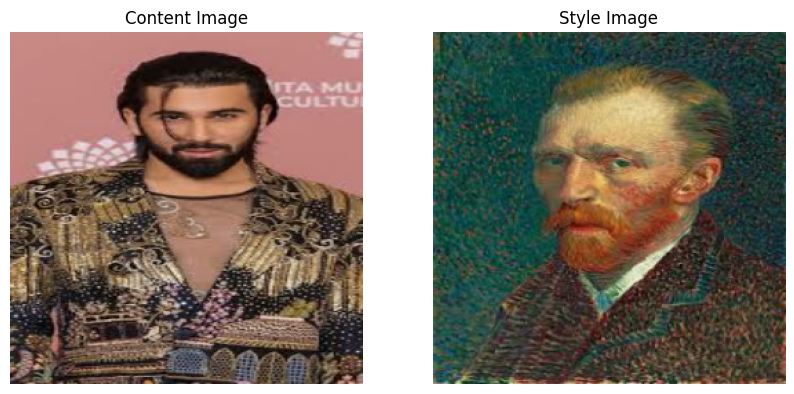

In [5]:
# Helper function to load and preprocess images
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (256, 256))  # Resize for faster processing
    return img[tf.newaxis, :]

# Load images
content_image = load_image('/content/download (1).jpg')
style_image = load_image('/content/download (3).jpg')

# Display the input images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(content_image[0])
plt.title("Content Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(style_image[0])
plt.title("Style Image")
plt.axis("off")
plt.show()


In [2]:
# Load TensorFlow Hub's pre-trained style transfer model
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


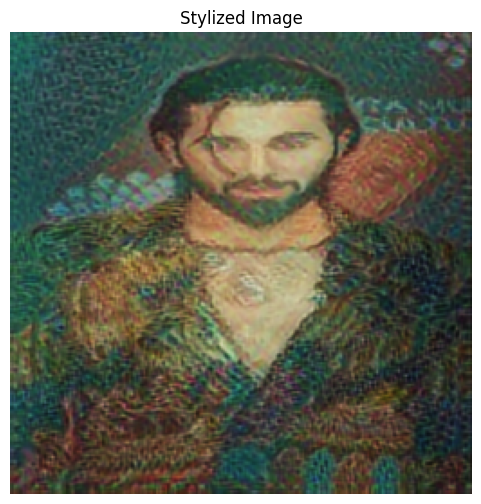

In [6]:
# Apply style transfer
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

# Display the stylized image
plt.figure(figsize=(6, 6))
plt.imshow(stylized_image[0])
plt.title("Stylized Image")
plt.axis("off")
plt.show()
